In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset 
%matplotlib inline
plt.style.use('ggplot') 
data = load_dataset("titanic")

In [ ]:
data.head(10)

In [ ]:
data.columns

In [ ]:
data.drop('class',
  axis='columns', inplace=True)

In [ ]:
data.drop('who',
  axis='columns', inplace=True)

In [ ]:
data.drop('alive',
  axis='columns', inplace=True)

In [ ]:
data.shape

In [3]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [83]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
data.describe().T

In [84]:
data.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

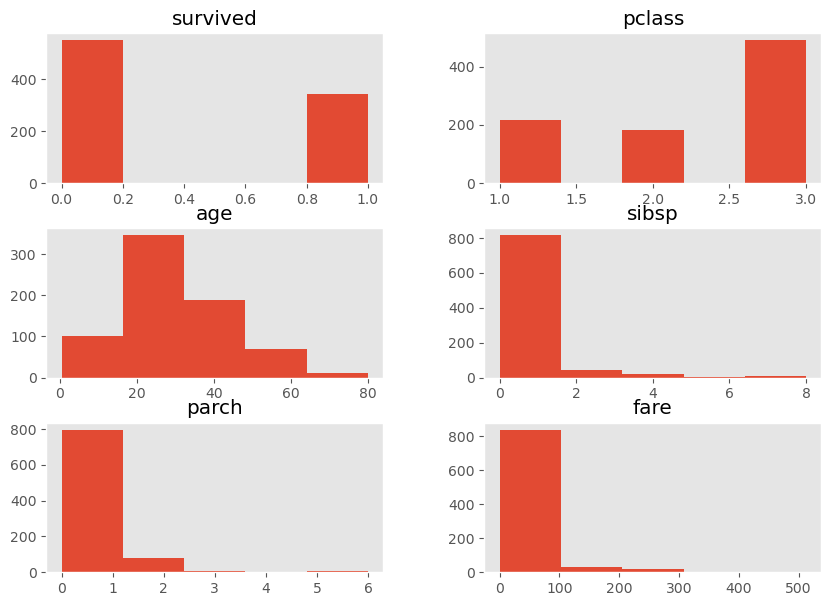

In [85]:
data.hist(bins=5,figsize=(10,7),grid=False);

In [ ]:
sns.countplot(x='survived', data=data)
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival ')
plt.show()

In [ ]:


data.sex.value_counts()

In [ ]:
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=data, x="sex", ax=ax1[0])
data["sex"].value_counts().plot.pie(shadow=False, autopct="%1.1f%%", explode=[0.1, 0], ax=ax1[1])

plt.show()

In [ ]:
data.groupby(["sex","survived"])["survived"].count()


In [ ]:
su_m = data[(data["survived"] == 1) & (data["sex"] == "male")]
su_f = data[(data["survived"] == 1) & (data["sex"] == "female")]

df_sur = pd.concat([su_m, su_f])
df_sur["sex"].value_counts().plot.pie(explode=[0, 0.1], shadow=False, autopct="%1.1f%%")
plt.show()


From the above Pie plot, I find the  observation  that  survival for women is greater than the men.  while almost 68% women survived , only 31.9% of men survived.So Assuming that women are more favoured for lifeboats than men.

In [86]:
data.age.isnull().sum()

177

In [ ]:
data.dropna(subset="age",inplace=True)

In [87]:
data["age"].isnull().sum()

177

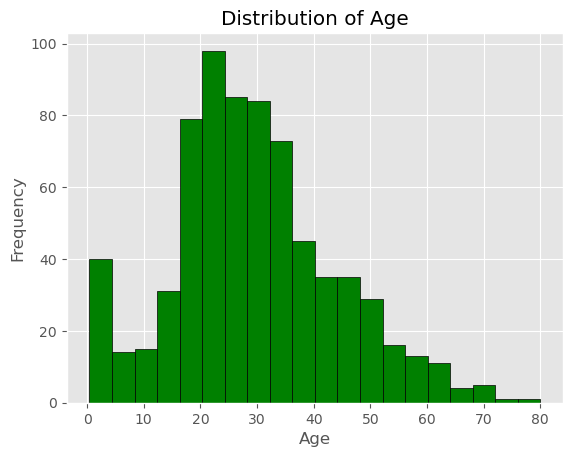

In [88]:
plt.hist(data['age'], bins=20,edgecolor='black',color='green')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


In [89]:
data[["age"]].value_counts()

age  
24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
         ..
20.50     1
14.50     1
12.00     1
0.92      1
80.00     1
Name: count, Length: 88, dtype: int64

In [ ]:
data.age.max()

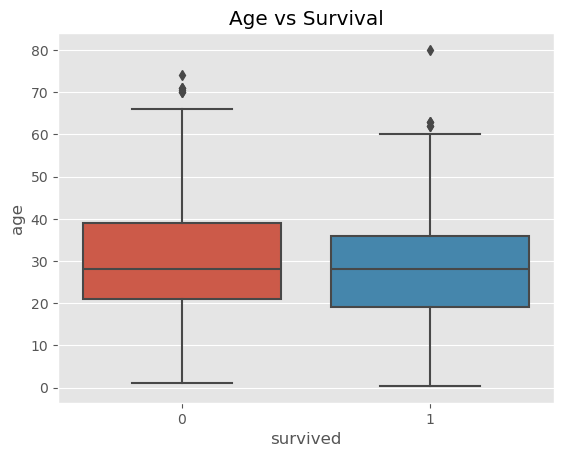

In [90]:
sns.boxplot(x = 'survived', y = 'age', data = data)
plt.title('Age vs Survival')
plt.show()

In [ ]:
data[data["survived"]==1].age.value_counts()

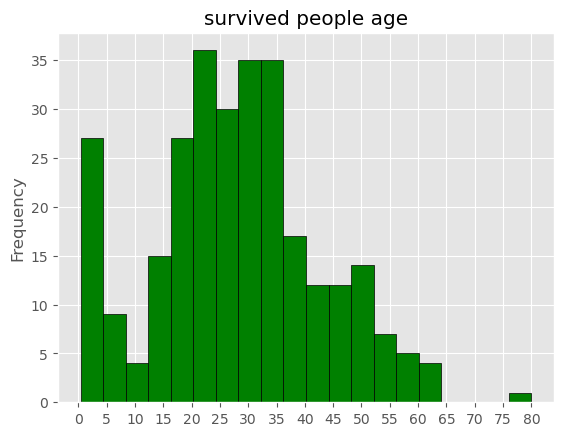

In [91]:
fig,ax=plt.subplots()

data[data["survived"]==1].age.plot.hist(bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax.set_xticks(x2)
ax.set_title('survived people age')
plt.show()

In [ ]:
data.age.isnull().sum()

C:\Users\User\anaconda3\envs\py_ml\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


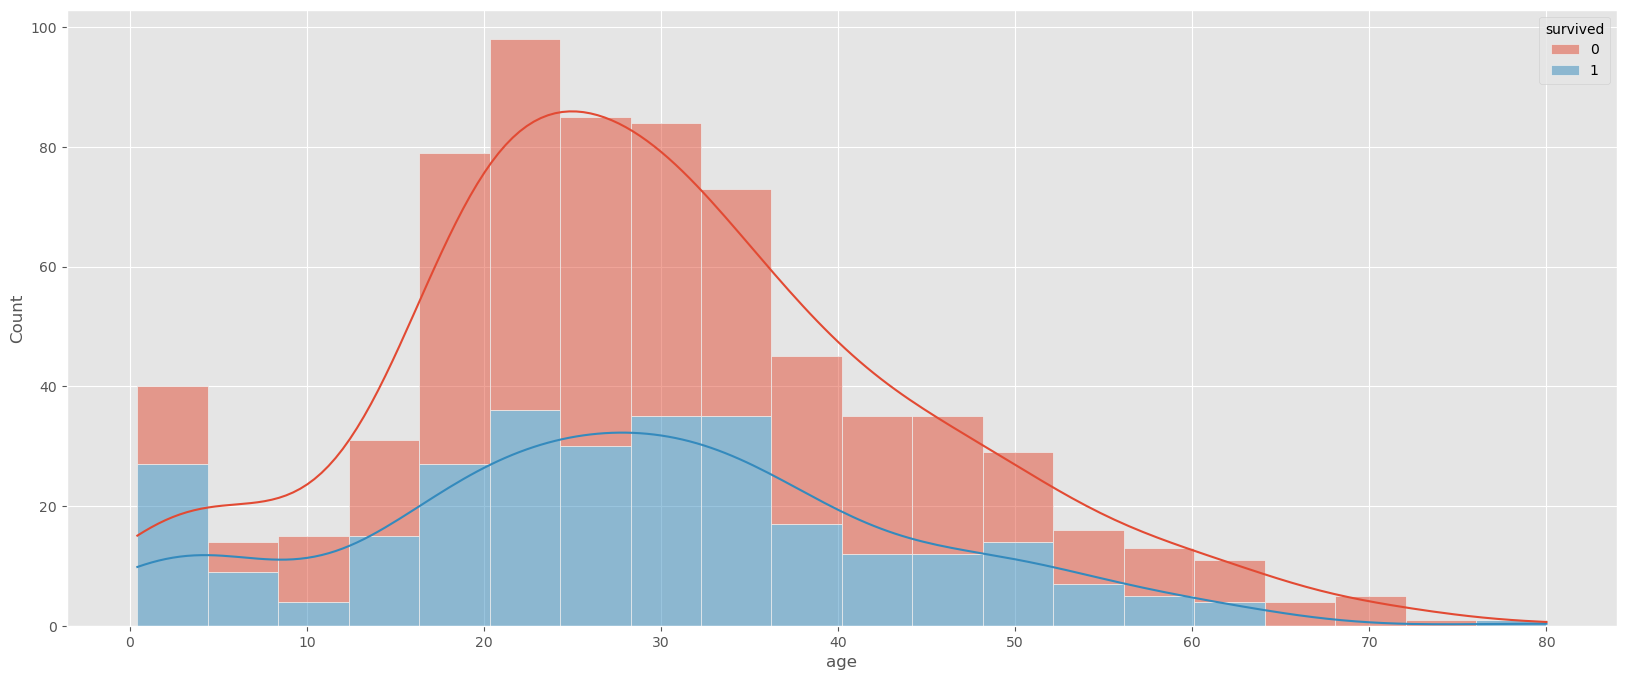

In [92]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.histplot(data=data, x="age", hue="survived", multiple="stack", kde=True)
plt.show()

From the plot, I find that most of survival people are in the age range (20-30).And Most of young children from (0-8) years survived.So I assume that children are faovoured for lifeboats. 

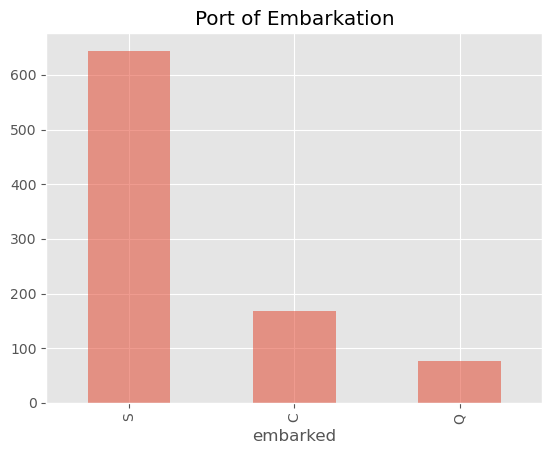

In [93]:
data.embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Port of Embarkation");

In [ ]:
data.embarked.isnull().sum()

In [94]:
data.dropna(subset = "embarked",inplace=True)

In [95]:
data.embarked.isnull().sum()

0

In [96]:
data.deck.value_counts()

deck
C    59
B    45
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [97]:
data.deck.isnull().sum()

688

In [98]:
data.pclass.isnull().sum()

0

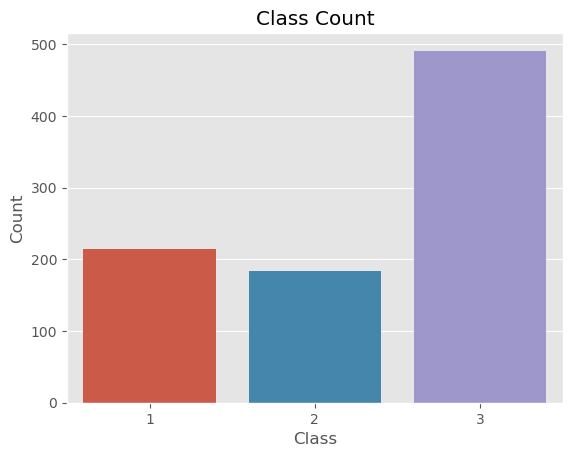

In [99]:
sns.countplot(x='pclass', data=data)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Count')
plt.show()

In [ ]:


#pd.crosstab([data.pclass],data.survived,margins=True).style.background_gradient(cmap='summer_r')
su_1 = data[(data["survived"] == 1) & (data["pclass"] == 1)]
su_1
su_2 = data[(data["survived"] == 1) & (data["pclass"] == 2)]
su_3 = data[(data["survived"] == 1) & (data["pclass"] == 3)]

df_sur = pd.concat([su_1, su_2,su_3])

df_sur["pclass"].value_counts().plot.pie(explode=[0, 0.1,0.1], shadow=False, autopct="%1.1f%%")
#plt.show()

#

From three passenger class,people from 1st class more survived than 2nd and 3rd class.

In [100]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [101]:
data.parch.isnull().sum()


0

In [102]:
data['alone'].replace(['True', 'False'],
                        [1, 0], inplace=True)

In [ ]:
data.alone

C:\Users\User\AppData\Local\Temp\ipykernel_2604\2731647822.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['parch'],kde=False)


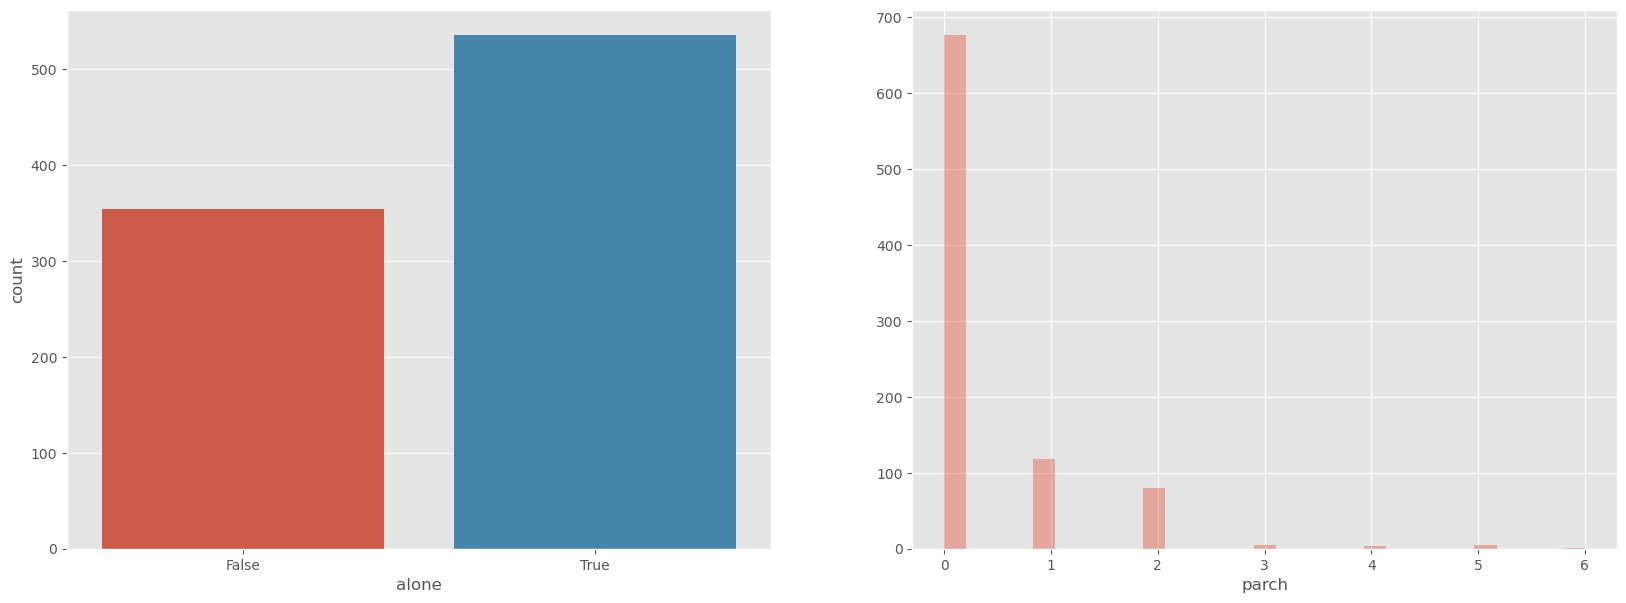

In [103]:
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=data, x="alone", ax=ax1[0])
sns.distplot(data['parch'],kde=False)

plt.show()


Most of passengers from Titanic have no children or parents and come alone.

In [ ]:
for x in [1,2,3]:    ## for 3 classes
    data.age[data.pclass == x].plot(kind="kde")
plt.title("Age and Pclass")
plt.legend(("1st","2nd","3rd"))

From the above we can conclude that more older people are from 1st class than that of 2nd and 3rd.

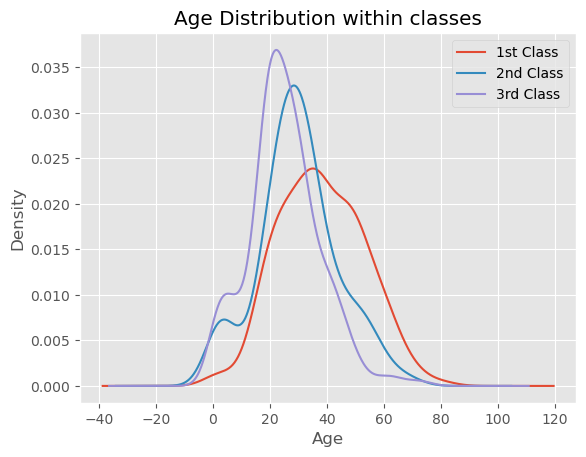

In [104]:
data.age[data.pclass == 1].plot(kind='kde')    
data.age[data.pclass == 2].plot(kind='kde')
data.age[data.pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;


From the above we can conclude that more older people are from 1st class than that of 2nd and 3rd.

In [ ]:
data.survived[data.sibsp].plot(kind='kde')    

plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;


C:\Users\User\anaconda3\envs\py_ml\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: xlabel='parch', ylabel='sibsp'>

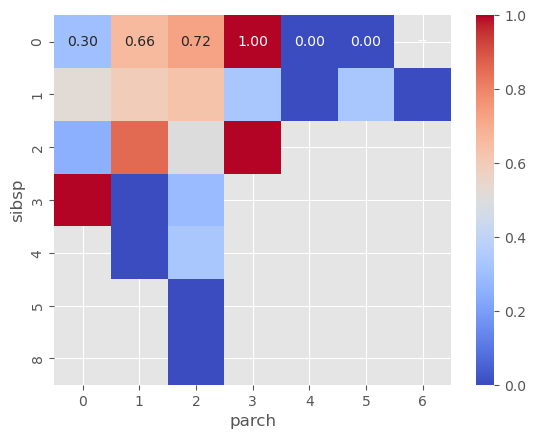

In [105]:
sibsp_parch = data.groupby(['sibsp', 'parch'])['survived'].mean().reset_index()

# Create a pivot table to reshape the data for heat map plotting
sibsp_parch_pivot = sibsp_parch.pivot(index='sibsp', columns='parch', values='survived')

# Plot the heat map
sns.heatmap(sibsp_parch_pivot, cmap='coolwarm', annot=True, fmt='.2f')

Passengers with alot of family members however, had little to no chances of survival. 

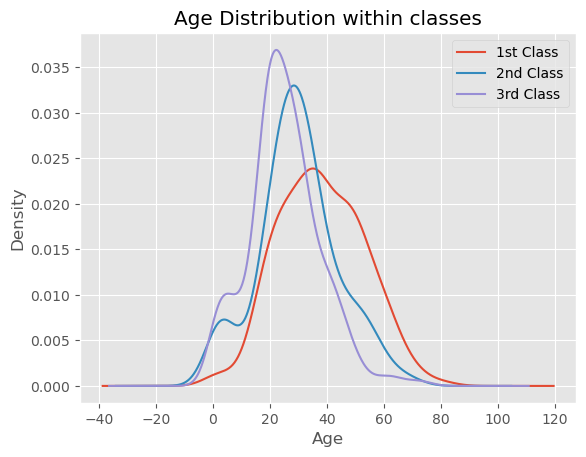

In [106]:
data.age[data.pclass == 1].plot(kind='kde')    
data.age[data.pclass == 2].plot(kind='kde')
data.age[data.pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;


In [ ]:
data["family_member"]= data["sibsp"] + data["parch"] +1
sns.barplot(x="family_member", y="survived", data=data);


It seems that for families from 1 to 4 people, family size increases survival rates. But for families of 5 and up, survival rates is much lower.

In [ ]:
data.info()

In [108]:
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,False,NaN,Cherbourg,yes,False


In [4]:
# Importing LabelEncoder from Sklearn 
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(data['adult_male'])

# removing the column 'Purchased' from df
# as it is of no use now.
data.drop("adult_male", axis=1, inplace=True)

# Appending the array to our dataFrame 
# with column name 'Purchased'
data["adult_male"] = label

# printing Dataframe
data.head(10)



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,deck,embark_town,alive,alone,adult_male
0,0,3,male,22.0,1,0,7.2500,S,Third,man,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,NaN,Southampton,no,True,1
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,NaN,Queenstown,no,True,1
6,0,1,male,54.0,0,0,51.8625,S,First,man,E,Southampton,no,True,1
7,0,3,male,2.0,3,1,21.0750,S,Third,child,NaN,Southampton,no,False,0
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,NaN,Southampton,yes,False,0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,NaN,Cherbourg,yes,False,0


In [5]:
data.drop('deck',
  axis='columns', inplace=True)

In [6]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'embark_town', 'alive', 'alone',
       'adult_male'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  embark_town  889 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
 13  adult_male   891 non-null    int64   
dtypes: bool(1), category(1), float64(2), int64(5), object(5)
memory usage: 85.5+ KB


In [11]:
data.shape

(891, 14)

In [15]:
def checkNull_fillData(df):
    for col in df.columns:
        if len(df.loc[df[col].isnull() == True]) != 0:
            if df[col].dtype == "object":
                df.loc[df[col].isnull() == True,col] = df[col].mode()[0]
            else:
                df.loc[df[col].isnull() == True,col] = df[col].mean()
                
checkNull_fillData(data)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  embark_town  891 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
 13  adult_male   891 non-null    int64   
dtypes: bool(1), category(1), float64(2), int64(5), object(5)
memory usage: 85.5+ KB


from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
columns_to_one_hot = ['embarked','embark_town','alone']
encoded_array = enc.fit_transform(data.loc[:,columns_to_one_hot])
df_encoded = pd.DataFrame(encoded_array,columns=enc.get_feature_names_out() )
df_sklearn_encoded = pd.concat([data,df_encoded],axis=1)
df_sklearn_encoded.drop(labels= columns_to_one_hot,axis=1,inplace=True)
df_sklearn_encoded.info()

df_sklearn_encoded.shape

df_sklearn_encoded.isnull().sum()

In [13]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
embark_town    0
alive          0
alone          0
adult_male     0
dtype: int64

In [ ]:
data.drop()

In [16]:
train_object = data.select_dtypes(include="object")
train_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sex          891 non-null    object
 1   embarked     891 non-null    object
 2   who          891 non-null    object
 3   embark_town  891 non-null    object
 4   alive        891 non-null    object
dtypes: object(5)
memory usage: 34.9+ KB


In [17]:
data.drop('who',
  axis='columns', inplace=True)

In [19]:
data.drop('class',
  axis='columns', inplace=True)

In [20]:
data.drop('embark_town',
  axis='columns', inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    object 
 8   alive       891 non-null    object 
 9   alone       891 non-null    bool   
 10  adult_male  891 non-null    int64  
dtypes: bool(1), float64(2), int64(5), object(3)
memory usage: 70.6+ KB


In [22]:
train_object = data.select_dtypes(include="object")
train_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sex       891 non-null    object
 1   embarked  891 non-null    object
 2   alive     891 non-null    object
dtypes: object(3)
memory usage: 21.0+ KB


In [23]:
train_object_list = train_object.columns.values.tolist()
train_object_list

['sex', 'embarked', 'alive']

In [25]:
train_convert = pd.get_dummies(data,columns=train_object_list)
train_convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   alone       891 non-null    bool   
 7   adult_male  891 non-null    int64  
 8   sex_female  891 non-null    bool   
 9   sex_male    891 non-null    bool   
 10  embarked_C  891 non-null    bool   
 11  embarked_Q  891 non-null    bool   
 12  embarked_S  891 non-null    bool   
 13  alive_no    891 non-null    bool   
 14  alive_yes   891 non-null    bool   
dtypes: bool(8), float64(2), int64(5)
memory usage: 55.8 KB
